<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio5_completo_em_squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Desafio 5: Venda de veículos usados

### Bootcamp Data Analytics – WoMakersCode  
👩🏽‍💻 Squad: Mae C. Jemison
### 👥 Integrantes:

- Amparo Silvia Pastor Castillo Runschka  
- Cristiana Alves Moura  
- Fernanda Monello Correa Manoel  
- Larissa Monique de Sousa Rodrigues  
- Raquel Nunes Matos Rios  
- Vanessa Lima Paraizo  
- Verônica Lima Costa  

---

## 📝 Descrição do Desafio

Você trabalha em uma empresa de revenda de veículos usados. O sucesso da empresa depende fortemente da **precificação adequada dos veículos**.  

- 💸 Se o preço for **muito alto**, o carro **não vende**.  
- 📉 Se for **muito baixo**, a empresa **perde dinheiro**.  

Como parte da equipe de dados, você recebeu uma base com informações sobre carros vendidos nos últimos anos. Seu objetivo é:

- 🔍 Entender **quais fatores mais impactam no preço de venda**;  
- 📊 Realizar uma **análise exploratória baseada em correlações**;  
- 🤖 Aplicar **modelos preditivos simples** para auxiliar na definição de preços.

---

📁 *Este notebook contém todas as etapas da análise de dados desenvolvida para o desafio.*


## 📚 Importação de Bibliotecas

Antes de começar, vamos importar as bibliotecas necessárias para manipulação, análise e visualização dos dados.

💻 Código

In [63]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Estatística
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### 📁 Visualização Inicial

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.

Nosso objetivo aqui é ter uma visão geral antes de qualquer limpeza ou tratamento.

💻 Código

In [64]:
# Configurando URL a partir do id do arquivo compartilhado

id_do_arquivo = "1MfeIjwt6IvRAXHX4Ta2bRgyZFmOTmUEt"
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'
df_carros = pd.read_csv(url)
df_carros.head()

,id,make,model,year,price,mileage,engine_size,fuel_type,transmission,doors,color,tax,mpg,sold_date
0,1,Volkswagen,Model B,2022,23859,94811,3.6,Diesel,Manual,2,Grey,288,39.2,2023-10-11
1,2,Chevrolet,Model A,2008,16953,128028,4.9,Diesel,Manual,5,Red,339,15.3,2021-04-22
2,3,BMW,Model B,2006,12332,49178,4.1,Diesel,Automatic,4,Red,458,37.2,2020-05-04
3,4,Chevrolet,Model B,2018,18475,42821,2.7,Hybrid,Manual,5,Silver,486,43.7,2021-06-20
4,5,Chevrolet,Model C,2017,12129,192799,2.8,Gasoline,Manual,4,Silver,295,19.1,2021-12-06


### 📉 Verificação de Valores Ausentes e Duplicatas

Nesta etapa, vamos verificar se existem valores ausentes ou registros duplicados no dataset.

Esses problemas podem impactar os resultados das análises estatísticas e visualizações, e devem ser tratados ainda na fase de pré-processamento.

💻 Código

In [65]:
# Verificar tipos de dados e valores nulos
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   make          1000 non-null   object 
 2   model         1000 non-null   object 
 3   year          1000 non-null   int64  
 4   price         1000 non-null   int64  
 5   mileage       1000 non-null   int64  
 6   engine_size   1000 non-null   float64
 7   fuel_type     1000 non-null   object 
 8   transmission  1000 non-null   object 
 9   doors         1000 non-null   int64  
 10  color         1000 non-null   object 
 11  tax           1000 non-null   int64  
 12  mpg           1000 non-null   float64
 13  sold_date     1000 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 109.5+ KB


In [66]:
# Verificar valores ausentes
print("🔍 Valores ausentes por coluna:")
print(df_carros.isnull().sum())

# Verificar registros duplicados
duplicatas = df_carros.duplicated().sum()
print(f"\n📦 Registros duplicados encontrados: {duplicatas}")

🔍 Valores ausentes por coluna:
id              0
make            0
model           0
year            0
price           0
mileage         0
engine_size     0
fuel_type       0
transmission    0
doors           0
color           0
tax             0
mpg             0
sold_date       0
dtype: int64

📦 Registros duplicados encontrados: 0


In [67]:
# Obtenção de dados estatísticos
df_carros.describe()

,id,year,price,mileage,engine_size,doors,tax,mpg
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,2013.555000,20524.900000,106665.076000,2.978400,3.549000,294.58000,29.980800
std,288.819436,5.236066,7241.830627,55414.820244,1.151494,1.100368,114.83892,11.721802
min,1.000000,2005.000000,3000.000000,10203.000000,1.000000,2.000000,100.00000,10.100000
25%,250.750000,2009.000000,15836.250000,57933.500000,2.000000,3.000000,188.00000,20.300000
50%,500.500000,2014.000000,20622.500000,105654.000000,3.000000,4.000000,295.50000,29.600000
75%,750.250000,2018.000000,25378.250000,157543.250000,4.000000,5.000000,392.25000,40.400000
max,1000.000000,2022.000000,42823.000000,199651.000000,5.000000,5.000000,499.00000,50.000000


## 📚 Etapa 1: Análise de Correlação

* Calcule a correlação entre as variáveis numéricas e o preço do carro
(price).
* Quais variáveis estão mais correlacionadas com o preço?
* Quais estão menos correlacionadas?

In [68]:
# Selecionando variáveis numéricas de acordo com os tipos:

# Seleciona apenas colunas numéricas
num_df = df_carros.select_dtypes(include=['float64', 'int64'])

# Exibe os nomes das colunas numéricas
num_df.columns

Index(['id', 'year', 'price', 'mileage', 'engine_size', 'doors', 'tax', 'mpg'], dtype='object')

In [69]:
# Calculando a correlação com o preço

# Selecionando variáveis numéricas de acordo com os tipos:
# Excluindo 'id'
num_df = df_carros.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])

# Calcula a correlação de todas as variáveis numéricas com a variável 'price', excluindo a própria 'price'
correlations = num_df.drop(columns=['price']).corrwith(num_df['price']).sort_values(ascending=False)
# Exibe as correlações
print(correlations)

doors          0.033304
mileage        0.011115
tax            0.009043
engine_size   -0.000181
mpg           -0.008201
year          -0.033064
dtype: float64


In [70]:
# Identificar as variáveis mais e menos correlacionadas
most_correlated = correlations.abs().sort_values(ascending=False)

print("\nVariáveis mais correlacionadas com o preço:")
print(most_correlated.head(5))

print("\nVariáveis menos correlacionadas com o preço:")
print(most_correlated.tail(5))


Variáveis mais correlacionadas com o preço:
doors      0.033304
year       0.033064
mileage    0.011115
tax        0.009043
mpg        0.008201
dtype: float64

Variáveis menos correlacionadas com o preço:
year           0.033064
mileage        0.011115
tax            0.009043
mpg            0.008201
engine_size    0.000181
dtype: float64


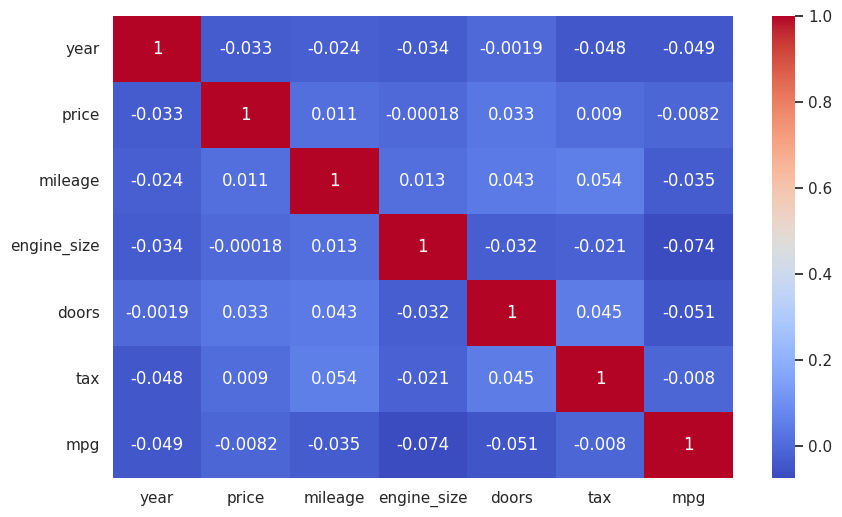

In [71]:
# Visualização através de um mapa de calor com as correlações
heatmap = sns.heatmap(num_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## 📚 Respostas:

Valor de r para demonstrar grau de relação segue valores mostrados:
- 0,00 a 0,19	Muito fraca ou nenhuma correlação
- 0,20 a 0,39	Fraca
- 0,40 a 0,69	Moderada
- 0,70 a 0,89	Forte
- 0,90 a 1,00	Muito forte

1.   Quais variáveis estão mais correlacionadas com o preço?
**Todas as variáveis possuem valores de correlação menores que 0,1, revelando que possuem nenhuma correlação ou correlação muito fraca.**

2.   Quais estão menos correlacionadas?
**As variáveis menos correlacionadas são: engine size (com valor de correlação igual a -0,00018)**



## 📚 Etapa 2: Análise das 5 variáveis mais correlacionadas
Para as cinco variáveis com maior correlação com o preço:
* 1. Plote histograma e boxplot de cada variável.
* 2. Plote o scatterplot (gráfico de dispersão), com price no eixo Y e a
variável no eixo X.
* 3. Faça uma regressão linear simples, utilizando cada variável como
preditora (X) e o preço como resposta (Y). Interprete os coeficientes e
o R².

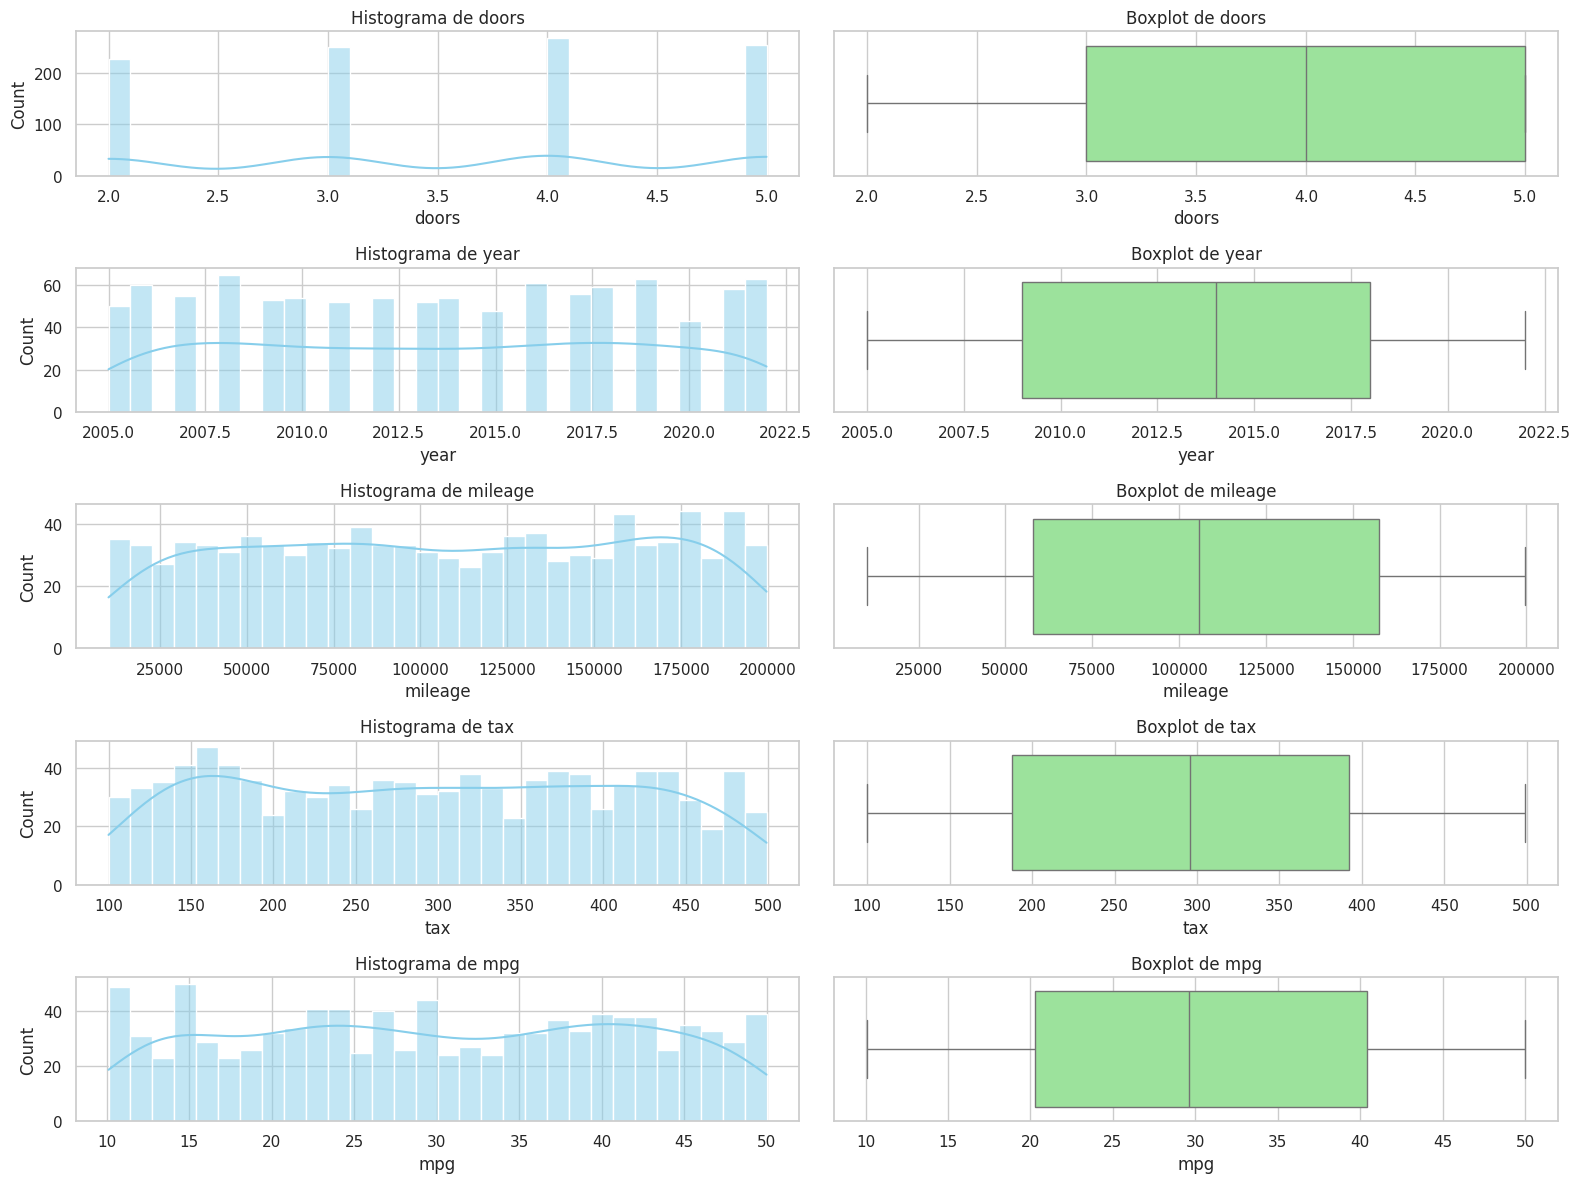

In [72]:
# Histograma e boxplot de cada uma das 5 variáveis com maior correlação com o preço
# Calcula a correlação das variáveis numéricas com 'price'
correlations = num_df.corr(numeric_only=True)['price'].drop('price')
top_5_vars = correlations.abs().sort_values(ascending=False).head(5).index

# Configurações de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Plotar histogramas e boxplots para as 5 variáveis
for i, col in enumerate(top_5_vars, 1):
    plt.subplot(5, 2, 2*i-1)
    sns.histplot(df_carros[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histograma de {col}")

    plt.subplot(5, 2, 2*i)
    sns.boxplot(x=df_carros[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

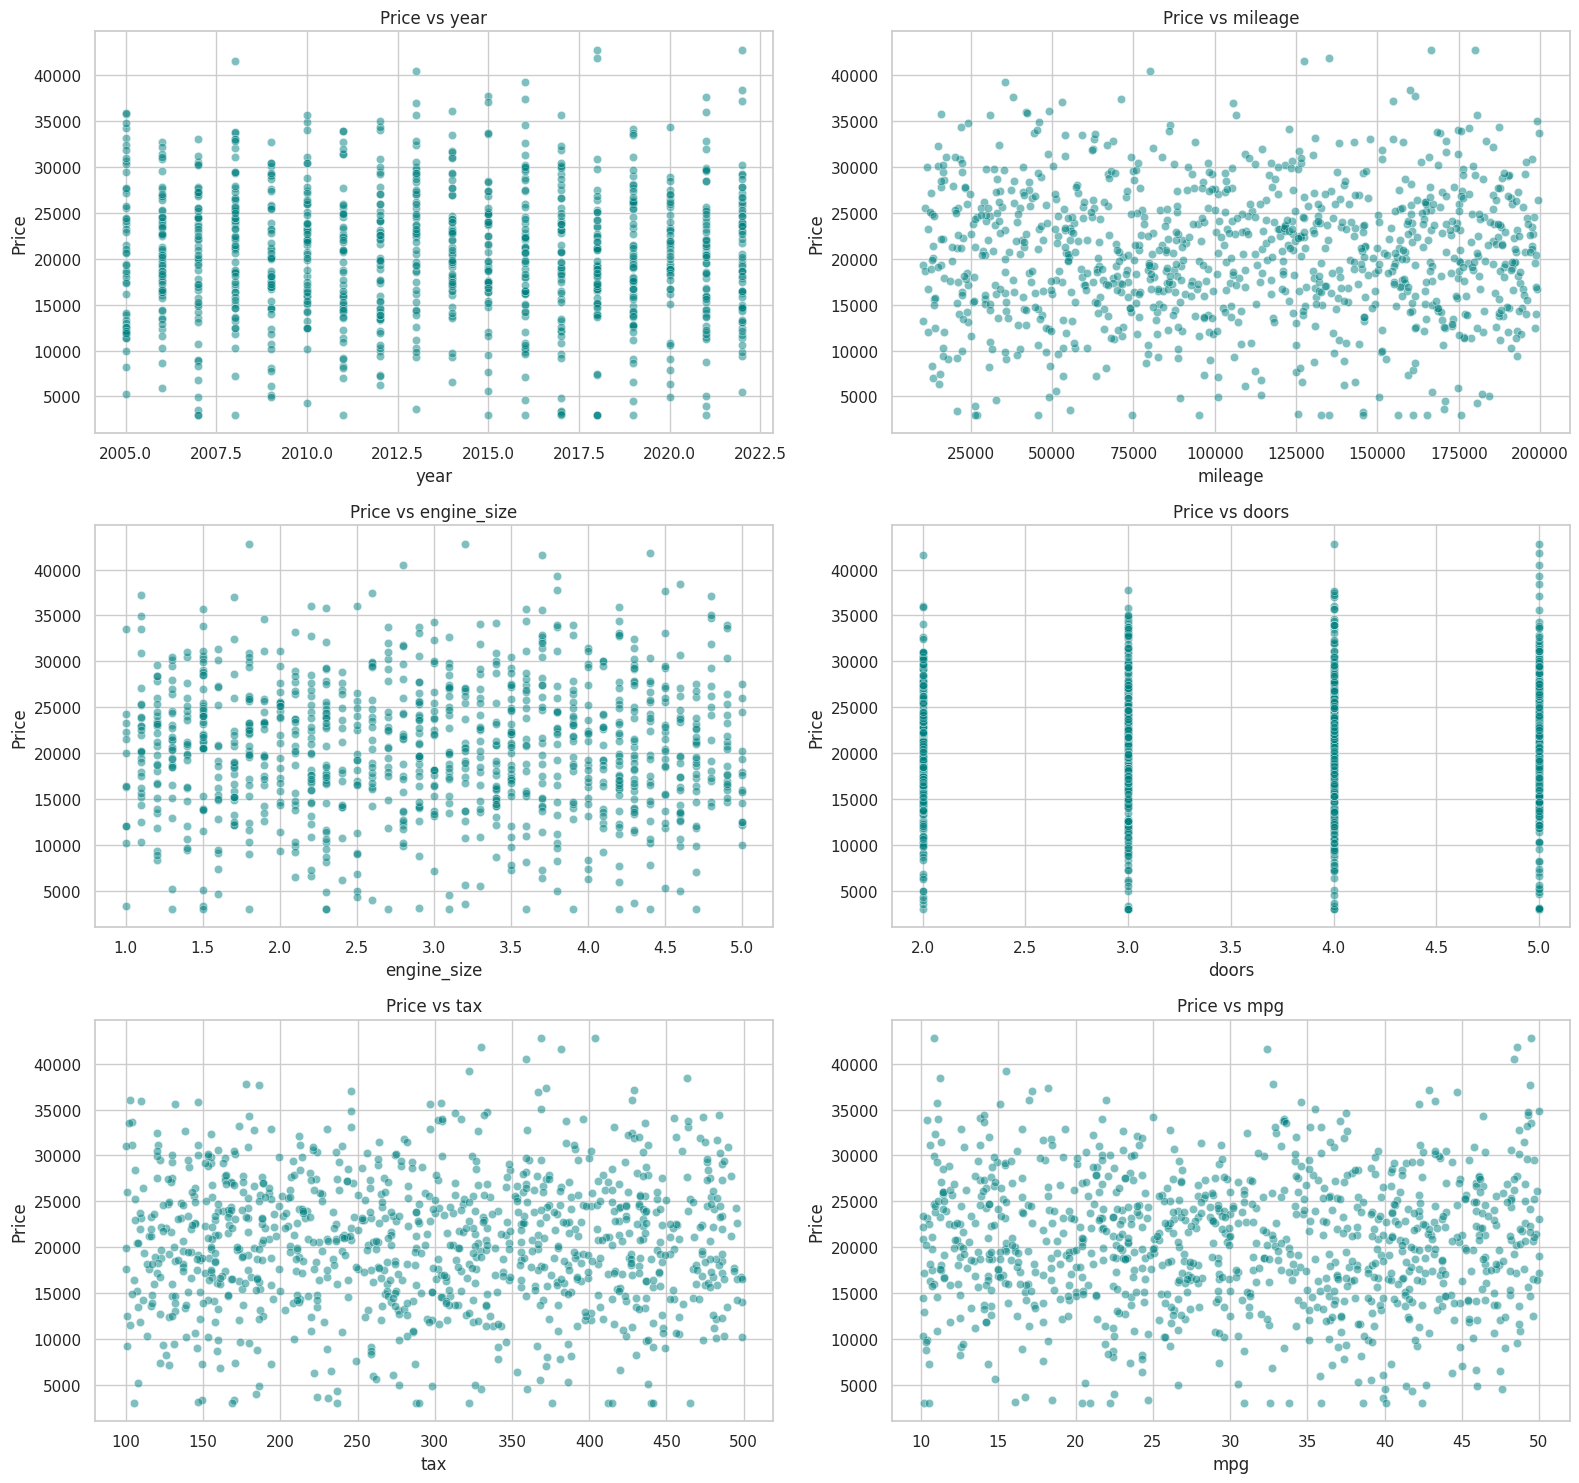

In [73]:
# Plote o scatterplot (gráfico de dispersão), com price no eixo Y e a variável no eixo X.
# Criar scatterplots de price versus cada variável numérica
plt.figure(figsize=(16, 15))

for i, col in enumerate([c for c in num_df if c != 'price'], 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df_carros[col], y=df_carros['price'], alpha=0.5, color="teal")
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [74]:
# Faça uma regressão linear simples, utilizando cada variável como preditora (X) e o preço como resposta (Y). Interprete os coeficientes e o R².
# Guardar resultados
results = []

# Rodar regressão para cada variável numérica (exceto o próprio 'price')
for col in [c for c in num_df if c != 'price']:
    X = df_carros[[col]].dropna()
    y = df_carros.loc[X.index, 'price']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    results.append({
        'Variável': col,
        'Coeficiente (β1)': model.coef_[0],
        'Intercepto (β0)': model.intercept_,
        'R²': r2
    })

# Colocar resultados em um DataFrame para visualizar melhor
regression_results = pd.DataFrame(results)
regression_results.sort_values(by='R²', ascending=False, inplace=True)
regression_results


,Variável,Coeficiente (β1),Intercepto (β0),R²
3,doors,219.180819,19747.027272,1.109135e-03
0,year,-45.729513,112603.790407,1.093218e-03
1,mileage,0.001453,20369.958207,1.235514e-04
4,tax,0.570252,20356.915280,8.177386e-05
5,mpg,-5.066666,20676.802694,6.725685e-05
2,engine_size,-1.141359,20528.299425,3.293607e-08


## Interpretação dos resultados

* Variável doors: Embora o número de portas apresente um coeficiente positivo de 219,18, indicando que carros com mais portas tendem a ter um preço ligeiramente mais alto, o valor de R² é de apenas 0,0011. Isso significa que essa variável explica somente 0,11% da variação no preço, sendo uma contribuição praticamente irrelevante para o modelo.

* Variável year: O ano de fabricação dos veículos, variável que se esperaria ter forte relação com o preço apresentou coeficiente negativo de -45,73. O modelo sugere que carros mais novos têm preços menores, o que vai contra a lógica de mercado. Isso pode ser reflexo de dados inconsistentes, presença de multicolinearidade ou até mesmo da simplicidade do modelo, que não leva em conta a interação entre variáveis. Além disso, o R² também é muito baixo (0,00109), mostrando que o ano, por si só, pouco explica o preço dos carros.

* Variável mileage: A quilometragem, por sua vez, também apresentou um comportamento contraintuitivo. O coeficiente positivo de 0,00145 sugere que, à medida que o carro acumula mais quilômetros rodados, seu preço aumenta. Essa tendência vai contra o esperado — normalmente, quanto maior a quilometragem, menor o preço. Novamente, o valor de R² é extremamente baixo (0,000123), indicando que essa variável tem influência quase nula no preço quando analisada isoladamente.

* Varíavel tax: O valor do imposto (tax) e o consumo de combustível (mpg) também apresentaram coeficientes baixos e valores de R² praticamente desprezíveis, com 0,0000817 e 0,0000673 respectivamente. Enquanto o imposto mostra um leve aumento no preço (coeficiente de 0,57), o consumo de combustível tem um efeito negativo (-5,07), sugerindo que veículos mais econômicos tendem a custar menos — o que também pode ser reflexo de uma relação inversa entre preço e tipo de carro (veículos mais baratos geralmente são mais econômicos).

* Por fim, o tamanho do motor (engine_size) foi a variável com menor poder explicativo entre as analisadas, com um R² quase nulo (0,0000000329) e um coeficiente também negativo (-1,14), sem qualquer relevância prática.